In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [7]:
df_Dirac_G_O = (1/2)*pd.read_csv(r'Channel/Dirac_G_O_Channel.txt', sep = '\t', header = None)
df_Dirac_P_O = (1/2)*pd.read_csv(r'Channel/Dirac_P_O_Channel.txt', sep = '\t', header = None)

df_Dirac_G_U = (1/2)*pd.read_csv(r'Channel/Dirac_G_U_Channel.txt', sep = '\t', header = None)
df_Dirac_P_U = (1/2)*pd.read_csv(r'Channel/Dirac_P_U_Channel.txt', sep = '\t', header = None)

df_Dirac_G_S = (1/2)*pd.read_csv(r'Channel/Dirac_G_S_Channel.txt', sep = '\t', header = None)
df_Dirac_P_S = (1/2)*pd.read_csv(r'Channel/Dirac_P_S_Channel.txt', sep = '\t', header = None)

In [8]:
df_Dirac_G_O.rename(columns = lambda s:s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.069905,0.660050,1.091965,2.292770,2.394175,2.798715,3.586350,3.553175,4.483725,4.260690
2,0.601905,0.872080,1.354915,2.086810,2.375590,2.771255,3.337300,3.770165,4.229495,3.969005
3,0.053526,0.682430,0.915850,1.164595,2.022645,2.964365,3.614150,4.103795,4.423340,4.672205
4,0.301718,0.652320,1.516180,2.132750,1.708275,2.879610,3.270690,3.515030,4.277665,4.267315
5,0.068698,1.241320,1.441535,1.608645,2.458245,2.792870,3.261015,3.778295,4.025570,4.703410
...,...,...,...,...,...,...,...,...,...,...
99996,0.495059,0.733490,1.554820,1.740460,2.132765,2.871330,3.103680,3.732130,4.255680,4.420680
99997,0.243624,0.518040,1.133625,1.511275,1.602890,3.104945,3.052430,3.446395,3.693920,4.576550
99998,0.410302,0.698570,1.309975,1.851555,2.012225,2.907295,2.962075,3.200905,4.266970,4.554380
99999,0.145519,0.694885,1.367565,2.004470,2.161235,2.816375,3.010600,3.456590,4.010540,4.836305


In [9]:
G_O = df_Dirac_G_O.values
P_O = df_Dirac_P_O.values

G_U = df_Dirac_G_U.values
P_U = df_Dirac_P_U.values

G_S = df_Dirac_G_S.values
P_S = df_Dirac_P_S.values

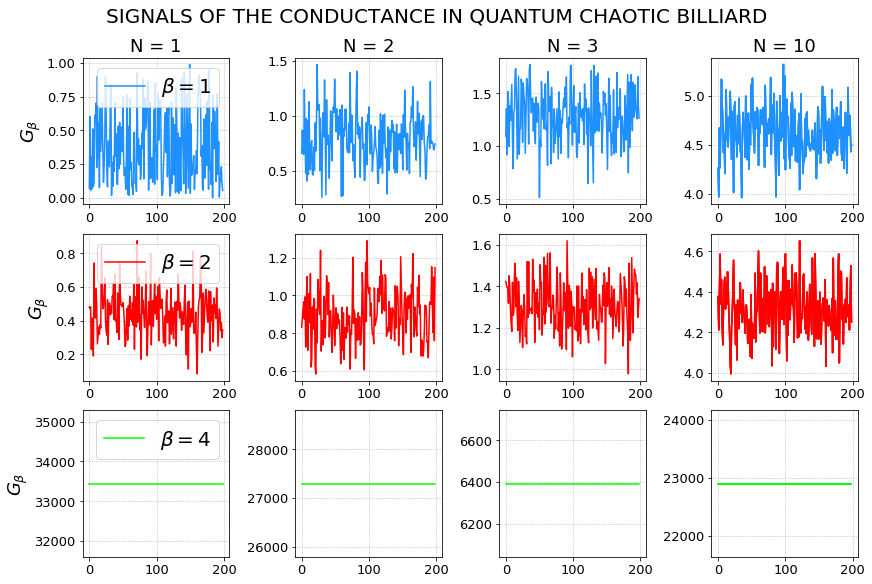

In [10]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        axs[i,j].grid(linestyle=':')

/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


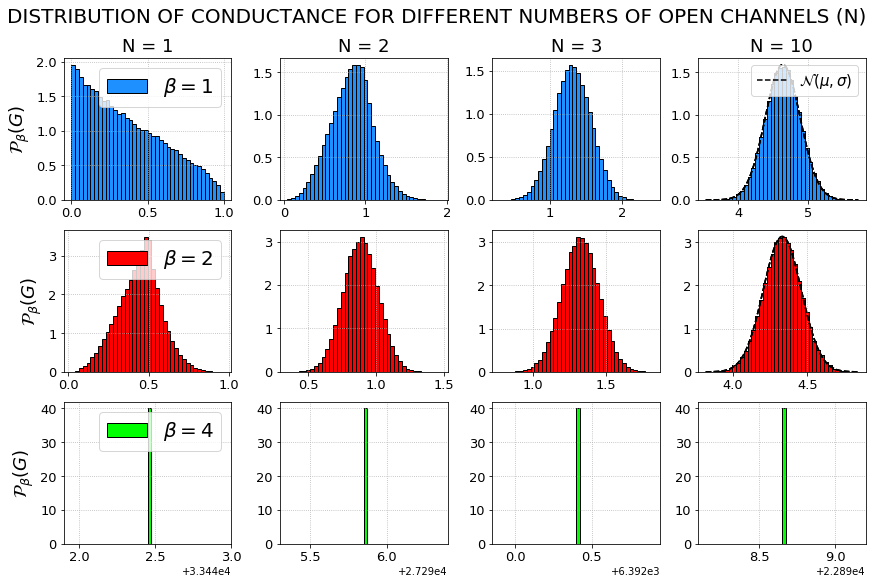

In [11]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

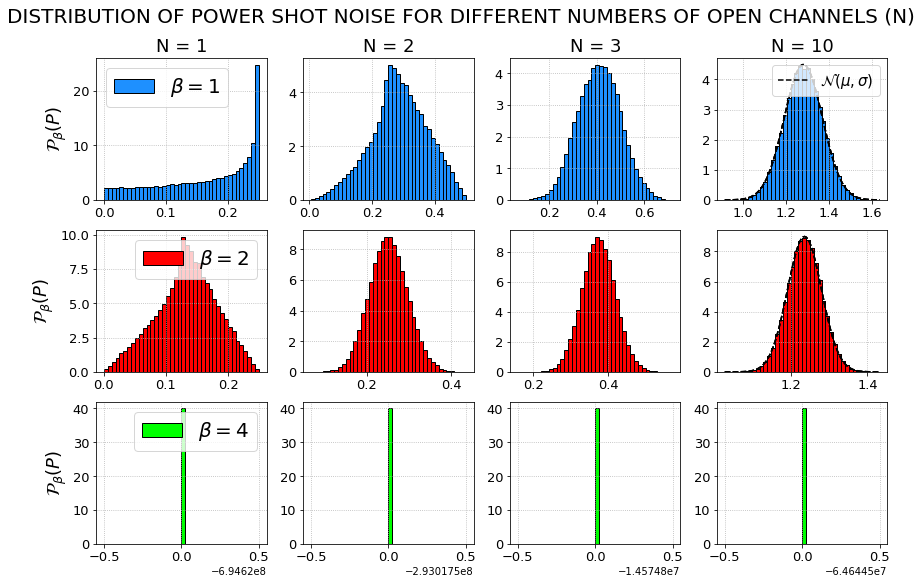

In [12]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')